### **PA1: N-Gram Models**

**1) Data collection and preprocessing**




**a)** Using 'Gutenberg' dataset from the nltk(Natural Language ToolKit) package. The Gutenberg dataset consists of famous literature works.

Importing and Downloading all the necessary packages and libraries

In [244]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import ConditionalFreqDist, ConditionalProbDist, MLEProbDist
from nltk.util import ngrams
from collections import Counter
import re
import random
import string
import math
import matplotlib.pyplot as plt


In [245]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**c)** Tokenization of text into words

In [246]:
data = gutenberg.raw()
print(data[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [247]:
words = word_tokenize(data)
print(words[:10])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']


In [248]:
len(words)

2538838

In [249]:
sentences = gutenberg.sents()
print(sentences[:10])

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ['CHAPTER', 'I'], ['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.'], ['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.'], ['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been',

**b)** Cleaning and preprocessing the data

Removing special characters, urls, punctuations, non-alphabetic words and converting them into lowercase

In [250]:
urls = re.compile(r'http[s]?://\S+|www\.\S+')
words = [word.lower() for word in words if word.isalpha() and not urls.match(word)]
print(words[:10])

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse']


Removing stopwords

In [251]:
stop_words=set(stopwords.words('english'))
meaningful_words=[word for word in words if word not in stop_words]
print(meaningful_words[:10])

['emma', 'jane', 'austen', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'rich']


**2) Model Implementation**

In [252]:
split_index = int(0.9 * len(words))
train_words = words[:split_index]
test_words =words[split_index:]
print(words[:20])
print(test_words[:20])

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy']
['by', 'eve', 'amazed', 'astonied', 'stood', 'and', 'blank', 'while', 'horrour', 'chill', 'ran', 'through', 'his', 'veins', 'and', 'all', 'his', 'joints', 'relaxed', 'from']


In [253]:
def ngrams_generation(words, n):
  n_grams=ngrams(words, n)
  return list(n_grams)

**a)** Calculating frequencies of tokenized text in the entire gutenberg dataset(Using Counter function from collections package)

In [254]:
n = int(input("Enter the value of n for calculating most occurring n-grams model:"))
frequency=Counter(ngrams_generation(meaningful_words, n))
print(f"Highest 5 occurring {n}-grams are", frequency.most_common(5))


Enter the value of n for calculating most occurring n-grams model:3
Highest 5 occurring 3-grams are [(('thus', 'saith', 'lord'), 416), (('lord', 'thy', 'god'), 306), (('saith', 'lord', 'god'), 277), (('lord', 'said', 'unto'), 182), (('shall', 'come', 'pass'), 131)]


**b)** Function that calculates probability of a word given n-1 words(n-1 grams).

In [255]:
def probability_distribution_with_smoothing(train_words, n, alpha=1):
    n_grams = list(ngrams_generation(train_words, n))
    vocabulary_size = len(set(train_words))
    cfd = ConditionalFreqDist((tuple(ng[:-1]), ng[-1]) for ng in n_grams)
    cpd = laplace_smoothing(cfd, vocabulary_size, alpha)
    return cpd, vocabulary_size

def nth_probability_with_smoothing(cpd, context, word, vocabulary_size, alpha=1):
    context_tuple = tuple(context)
    if context_tuple in cpd:
        return cpd[context_tuple].get(word, alpha /(vocabulary_size + alpha))
    else:
        return alpha / (vocabulary_size + alpha)

def word_combinations(cpd, context):
    context_tuple = tuple(context)
    if context_tuple in cpd:
        prob_dist = cpd[context_tuple]
        return [(word, prob) for word, prob in prob_dist.items()]
    else:
        return []

**c)** Function for prediction of next word given a sequence of previous n-1 words using their probabilities.

In [256]:
def next_word_prediction(cpd, context):
    context_tuple = tuple(context)
    if context_tuple in cpd:
        new_word=max(cpd[context_tuple], key=cpd[context_tuple].get)
        return new_word
    else:
        return None

**d)**  Generating a sequence of length 'l' given no-1 previous words.

In [257]:
def sequence_generation(cpd, context, l, vocabulary_size, alpha=1):
    current_sequence = list(context)
    generated_sequence = list(current_sequence)

    for _ in range(l - len(context)):
        new_word = next_word_prediction(cpd, current_sequence)
        if not new_word:
            break
        generated_sequence.append(new_word)
        current_sequence = current_sequence[1:] + [new_word]

    return ' '.join(generated_sequence)


**e)** Laplace smoothing technique for unseen n-grams

In [258]:
def laplace_smoothing(cfdist, vocabulary_size, alpha=1):
    smoothed_probability = {}
    for context in cfdist.conditions():
        total_count = sum(cfdist[context].values())
        smoothed_probability[context] = {
            word: (count + alpha) / (total_count + alpha * vocabulary_size)
            for word, count in cfdist[context].items()
        }
    return smoothed_probability

**3) Testing and evaluation**

**a) Testing by giving various (n-1)grams to generate next tokens**


In [259]:
n = int(input("Enter a value of 'n' for n-gram model: "))
cpd_train, vocabulary_size = probability_distribution_with_smoothing(train_words, n)

Enter a value of 'n' for n-gram model: 3


1. probability of word n appearing after given n-1 context

In [260]:
context = input(f"Enter the previous words(lower case) in the sentence (space-separated) of length {n-1}: ").split()
word = input("Enter the word to find the probability for: ")

probability = nth_probability_with_smoothing(cpd_train, context, word, vocabulary_size)
print(f"The probability of '{word}' appearing after '{' '.join(context)}' is: {probability}")

combinations = word_combinations(cpd_train, context)
total_prob = sum(prob for word, prob in combinations)
print(f"The total probability for previous n-1 words '{' '.join(context)}' is: {total_prob}")


Enter the previous words(lower case) in the sentence (space-separated) of length 2: it was
Enter the word to find the probability for: a
The probability of 'a' appearing after 'it was' is: 0.00753270062273951
The total probability for previous n-1 words 'it was' is: 0.09101786636934829


2. Predicting the next word n given previous n-1 words

In [261]:
context = input(f"Enter the previous words(lower case) in the sentence (space-separated) of length {n-1}: ").split()

predicted_word = next_word_prediction(cpd_train, context)
if predicted_word:
    print(f"The predicted word for given context '{' '.join(context)}' is: {predicted_word}")
else:
    print("No predictions are found")

Enter the previous words(lower case) in the sentence (space-separated) of length 2: youngest of
The predicted word for given context 'youngest of' is: the


3. generating a sequence of l-length using the previous n-1 words

In [262]:
context = input(f"Enter the previous words(lower case) in the sentence (space-separated) of length {n-1}: ").split()
l = int(input("Enter 'l' to generate a sentence of size l:"))

generated_sequence = sequence_generation(cpd_train, context, l, vocabulary_size)
print(f"The generated sequence of size {l} is: {generated_sequence}")

Enter the previous words(lower case) in the sentence (space-separated) of length 2: shall lord
Enter 'l' to generate a sentence of size l:10
The generated sequence of size 10 is: shall lord it is a very good sort of thing


**b)** preplexity of the model on a text set that was not used during the training

In [263]:
def calculate_perplexity(test_words, cpd, n, vocabulary_size, alpha=1):
    test_ngrams = ngrams_generation(test_words, n)
    N = len(test_ngrams)
    log_sum = 0.0
    for ngram in test_ngrams:
        context = ngram[:-1]
        word = ngram[-1]
        prob = nth_probability_with_smoothing(cpd, context, word, vocabulary_size, alpha)
        log_sum += -math.log(prob)
    perplexity = math.exp(log_sum / N)
    return perplexity


perplexity = calculate_perplexity(test_words, cpd_train, n, vocabulary_size)
print(f"The perplexity of the model on the test set is: {perplexity}")

The perplexity of the model on the test set is: 24666.218121258076


c) Comparison of perplexities of models with different values of n

Perplexity for n=1: 1490.2933640559224
Perplexity for n=2: 5779.263924142266
Perplexity for n=3: 24666.218121258076
Perplexity for n=4: 32936.7330177554
Perplexity for n=5: 33927.47157581156
Perplexity for n=6: 34017.32091508155
Perplexity for n=7: 34028.15396075717
Perplexity for n=8: 34029.3935372045
Perplexity for n=9: 34030.069705713155
Perplexity for n=10: 34030.52049182401
Perplexity for n=11: 34030.971288214045
Perplexity for n=12: 34031.19668595581
Perplexity for n=13: 34031.42208734448
Perplexity for n=14: 34031.534785906086
Perplexity for n=15: 34031.647485917805
Perplexity for n=16: 34031.760187379776
Perplexity for n=17: 34031.87289029193
Perplexity for n=18: 34031.98559465436
Perplexity for n=19: 34032.09830046707
Perplexity for n=20: 34032.211007729944
Perplexity for n=21: 34032.32371644325
Perplexity for n=22: 34032.436426606866
Perplexity for n=23: 34032.54913822094
Perplexity for n=24: 34032.66185128534
Perplexity for n=25: 34032.77456580022
Perplexity for n=26: 34032.

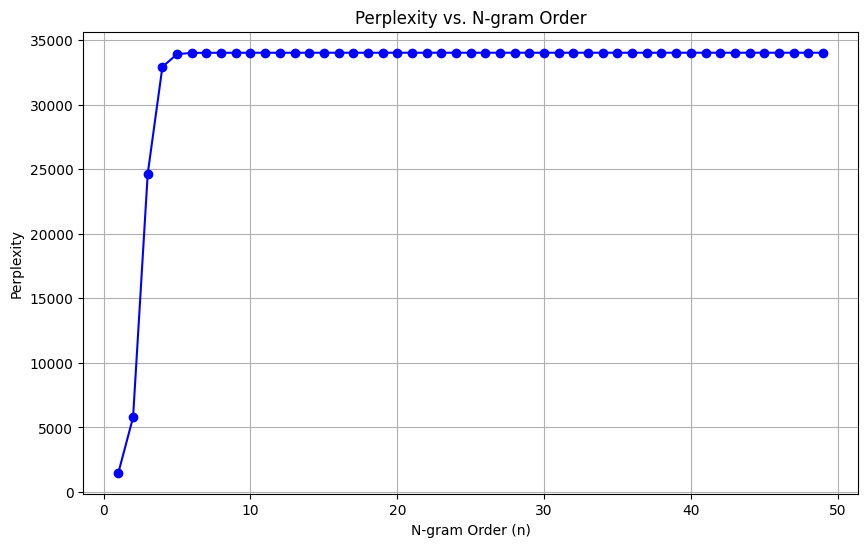

In [264]:
n_values = range(1, 50)
perplexities = []

for n in n_values:
    cpd_train, vocabulary_size = probability_distribution_with_smoothing(train_words, n)
    perplexity = calculate_perplexity(test_words, cpd_train, n, vocabulary_size)
    perplexities.append(perplexity)
    print(f"Perplexity for n={n}: {perplexity}")

# Plotting the perplexities
plt.figure(figsize=(10, 6))
plt.plot(n_values, perplexities, marker='o', linestyle='-', color='b')
plt.title('Perplexity vs. N-gram Order')
plt.xlabel('N-gram Order (n)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()